# Loan Default Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Anonymize_Loan_Default_data.csv',encoding='latin1')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


# Data Preprocessing Part 1

In [3]:
# Check the amount of unique value
df.select_dtypes(include='object').nunique()

term                      2
emp_length               11
home_ownership            5
verification_status       3
issue_d                  57
loan_status               9
purpose                  14
zip_code                834
addr_state               52
earliest_cr_line        528
revol_util             1109
last_pymnt_d            105
next_pymnt_d            103
last_credit_pull_d      110
dtype: int64

In [4]:
# Remove unused column and identifier column
df.drop(columns = ['Unnamed: 0', 'id', 'member_id', 'issue_d', 'zip_code', 'earliest_cr_line', 
                   'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,ZZ,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,1
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,0
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,NY,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,1
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,TX,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,0
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,NY,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,0


In [5]:
# Define the mapping
mapping = {1: 'fail', 0: 'good'}

# Use the map method to replace values in the 'repay_fail' column
df['repay_fail'] = df['repay_fail'].map(mapping)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,ZZ,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,fail
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,good
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,NY,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,fail
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,TX,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,good
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,NY,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,good


# Change Address State Value to make a good Data Visualization

In [7]:
df.addr_state.unique()

array(['ZZ', 'MI', 'NY', 'TX', 'AL', 'AZ', 'MO', 'OH', 'CA', 'AR', 'NJ',
       'WI', 'VA', 'GA', 'FL', 'AK', 'MA', 'MN', 'MD', 'NV', 'KY', 'IL',
       'AA', 'NH', 'CT', 'WA', 'NC', 'SD', 'UT', 'OR', 'DC', 'WY', 'KS',
       'PA', 'SC', 'RI', 'HI', 'LA', 'CO', 'WV', 'OK', 'VT', 'MT', 'NM',
       'DE', 'TN', 'MS', 'NE', 'IN', 'ID', 'IA', 'ME'], dtype=object)

In [8]:
state_mapping = {
    'ZZ': 'Unknown','MI': 'Michigan','NY': 'New York','TX': 'Texas','AL': 'Alabama','AZ': 'Arizona',
    'MO': 'Missouri','OH': 'Ohio','CA': 'California','AR': 'Arkansas','NJ': 'New Jersey','WI': 'Wisconsin',
    'VA': 'Virginia','GA': 'Georgia','FL': 'Florida','AK': 'Alaska','MA': 'Massachusetts','MN': 'Minnesota',
    'MD': 'Maryland','NV': 'Nevada','KY': 'Kentucky','IL': 'Illinois','AA': 'Armed Forces Americas',
    'NH': 'New Hampshire','CT': 'Connecticut','WA': 'Washington','NC': 'North Carolina','SD': 'South Dakota',
    'UT': 'Utah','OR': 'Oregon','DC': 'District of Columbia','WY': 'Wyoming','KS': 'Kansas','PA': 'Pennsylvania',
    'SC': 'South Carolina','RI': 'Rhode Island','HI': 'Hawaii','LA': 'Louisiana','CO': 'Colorado','WV': 'West Virginia',
    'OK': 'Oklahoma','VT': 'Vermont','MT': 'Montana','NM': 'New Mexico','DE': 'Delaware','TN': 'Tennessee',
    'MS': 'Mississippi','NE': 'Nebraska','IN': 'Indiana','ID': 'Idaho','IA': 'Iowa','ME': 'Maine'
}

# Use the replace method to replace values in the 'Address State' column
df['addr_state'].replace(state_mapping, inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,Unknown,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,fail
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,Michigan,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,good
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,New York,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,fail
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,Texas,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,good
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,New York,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,good


In [9]:
# Group by 'Address State' and calculate the percentage of 'repay_fail'
state_percentages = (
    df.groupby('addr_state')['repay_fail']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .mul(100)
    .rename(columns={0: 'Repay Success (%)', 1: 'Repay Failure (%)'})
)

# Reset the index to make 'Address State' a regular column
state_percentages.reset_index(inplace=True)

# Display the resulting DataFrame with percentages
state_percentages

repay_fail,addr_state,fail,good
0,Alabama,12.756264,87.243736
1,Alaska,20.779221,79.220779
2,Arizona,15.070093,84.929907
3,Arkansas,13.025210,86.974790
4,Armed Forces Americas,0.000000,100.000000
5,California,16.627184,83.372816
6,Colorado,11.673152,88.326848
7,Connecticut,13.157895,86.842105
8,Delaware,12.903226,87.096774
9,District of Columbia,7.653061,92.346939


In [10]:
state_percentages.to_csv('state_percentages.csv', index=False)

# Exploratory Data Analysis

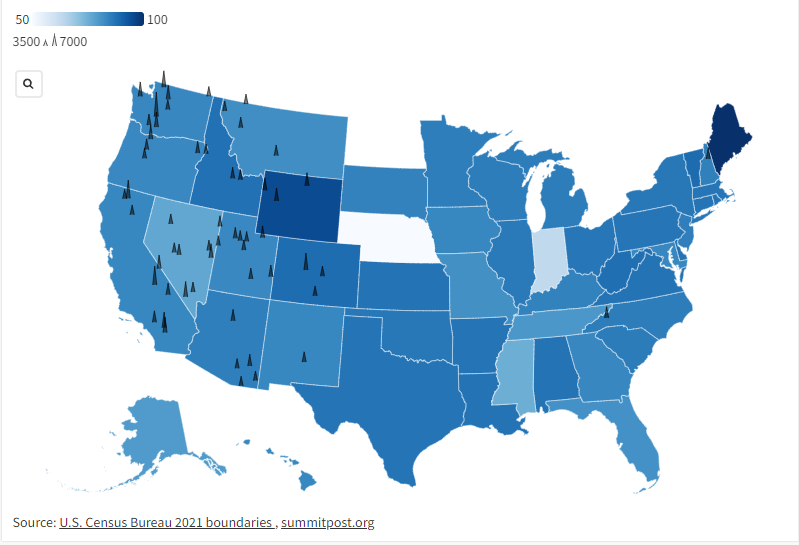

Based on the Data Above, Maine, Wyoming and Idaho is the top 3 most successfull repayment rate

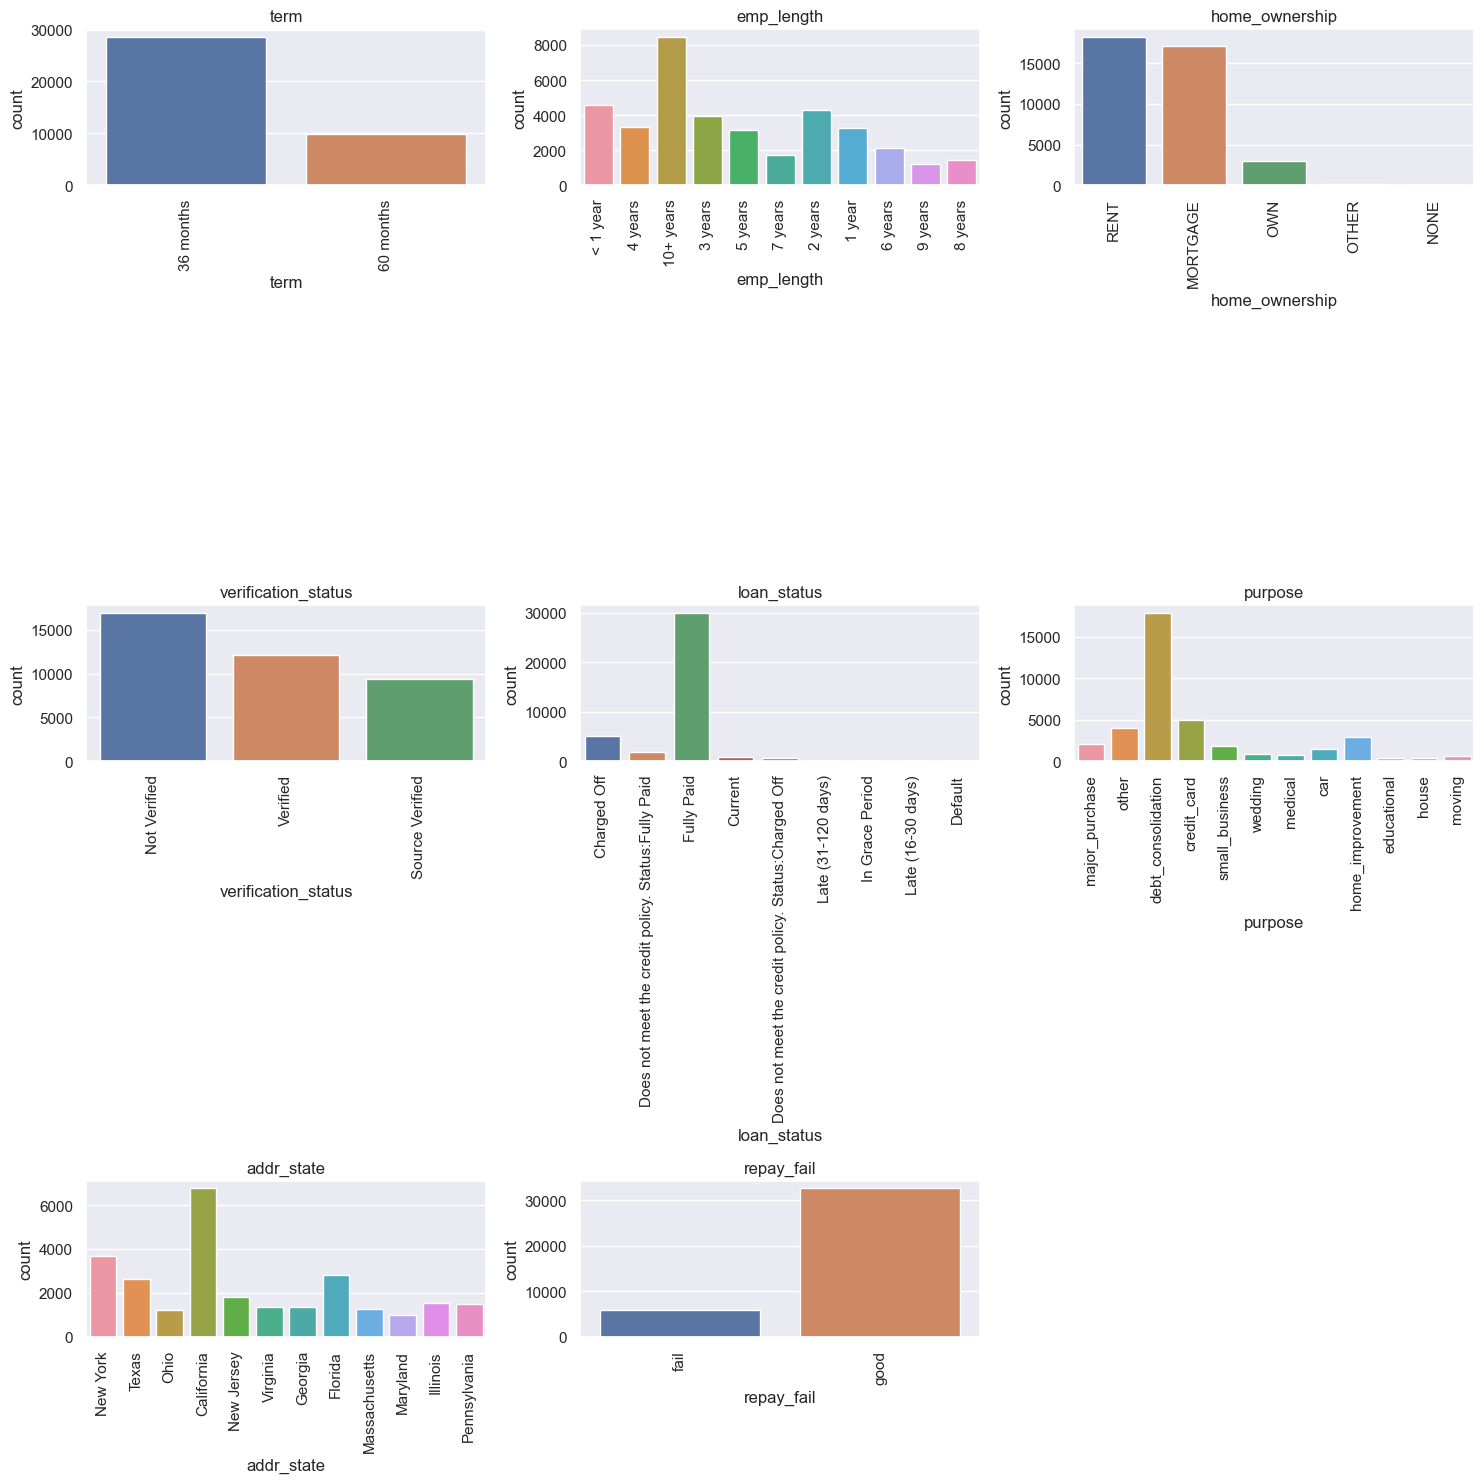

In [11]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 5 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(12).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

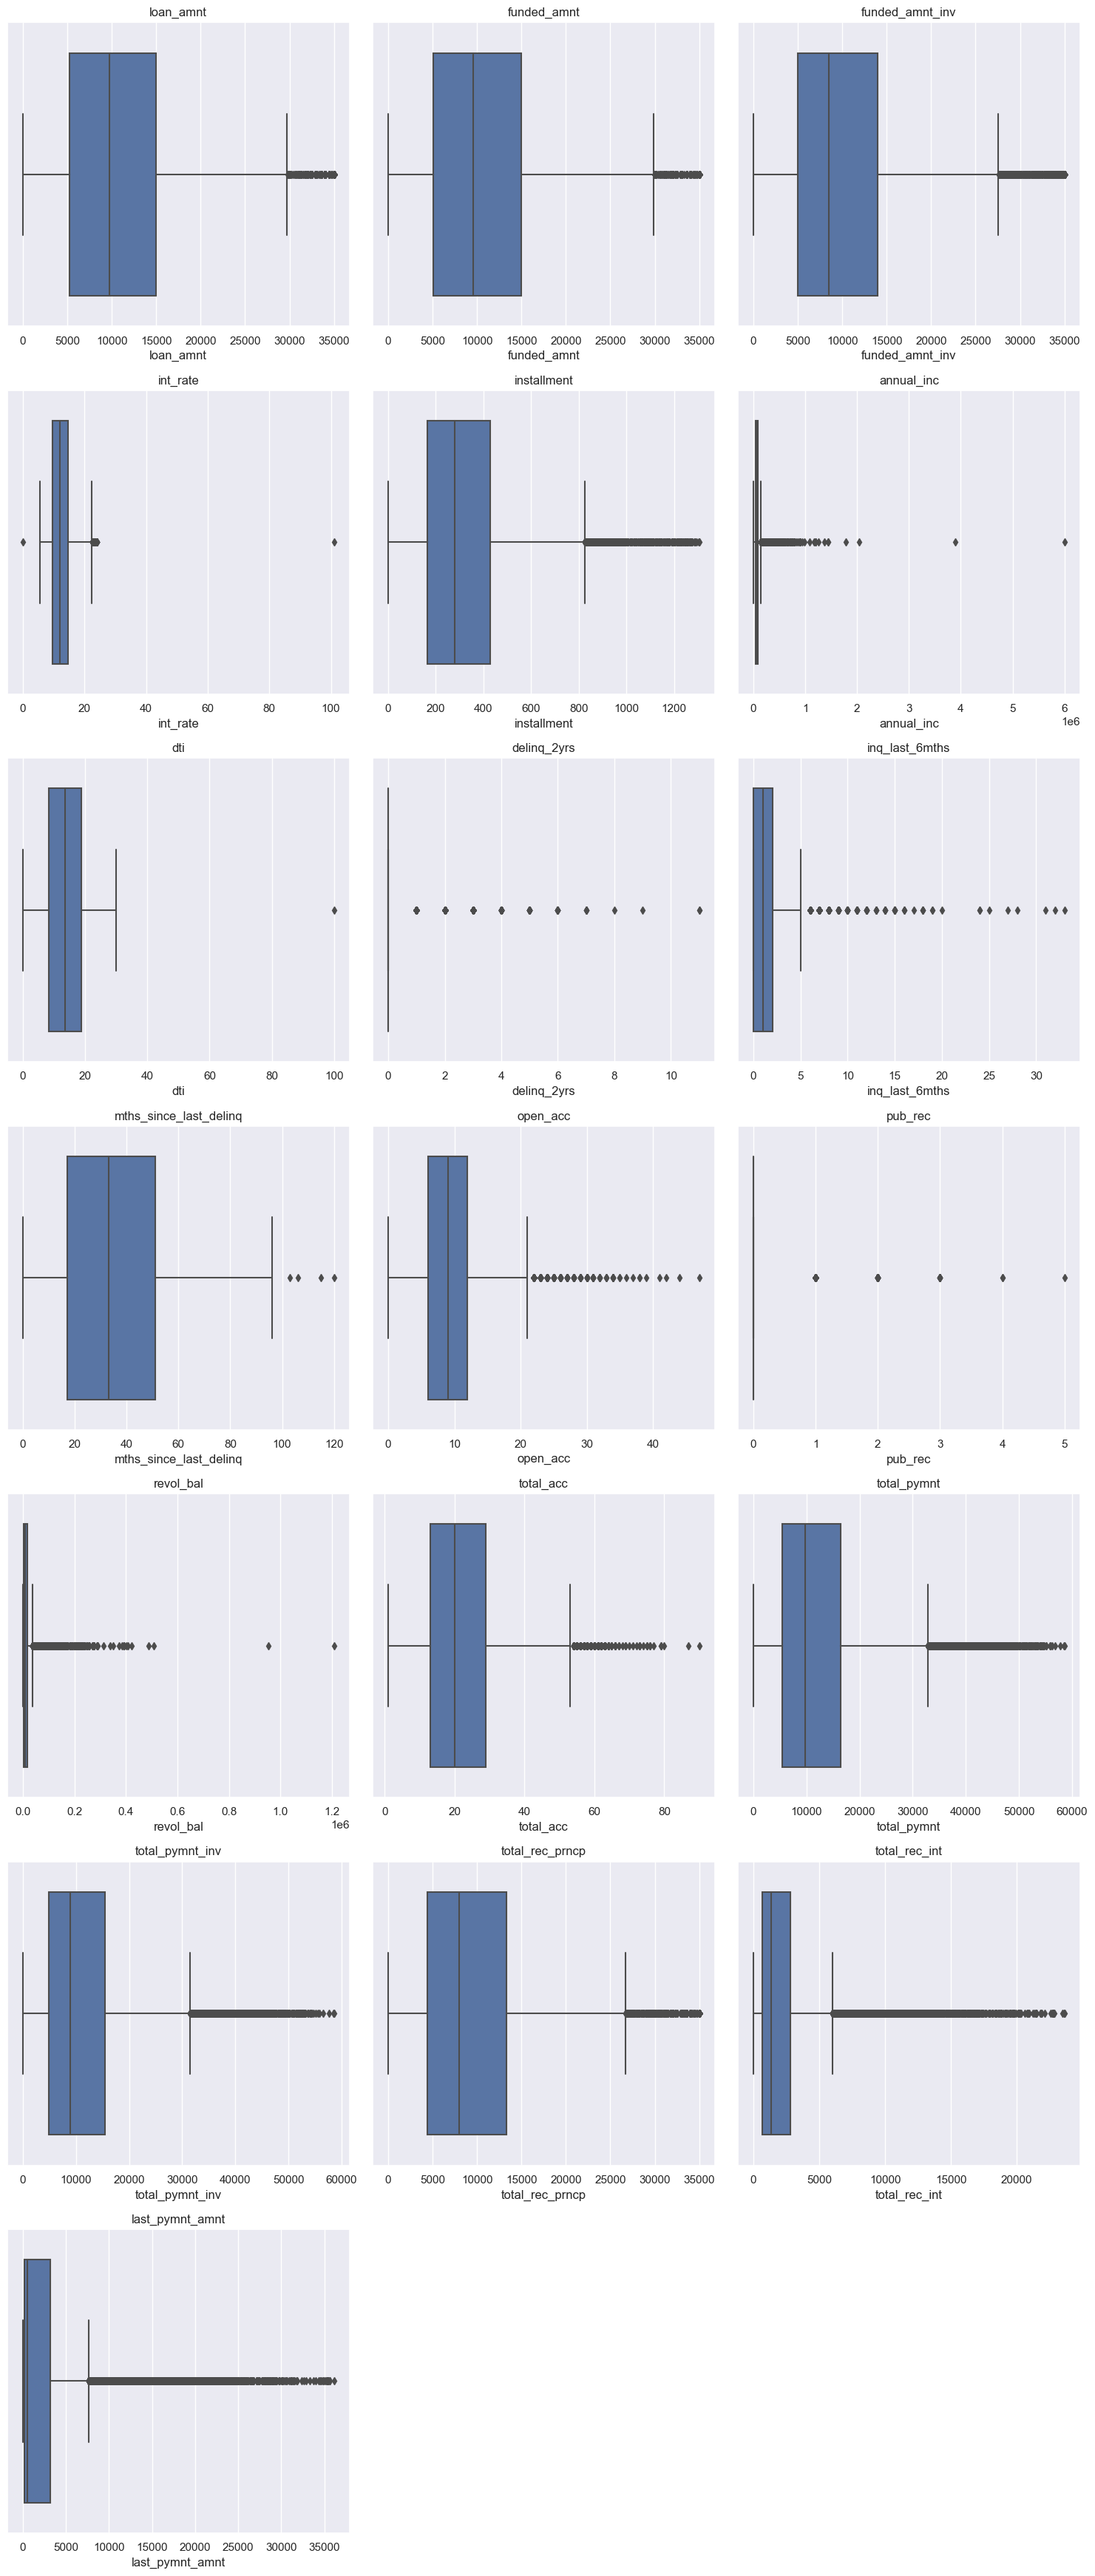

In [12]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

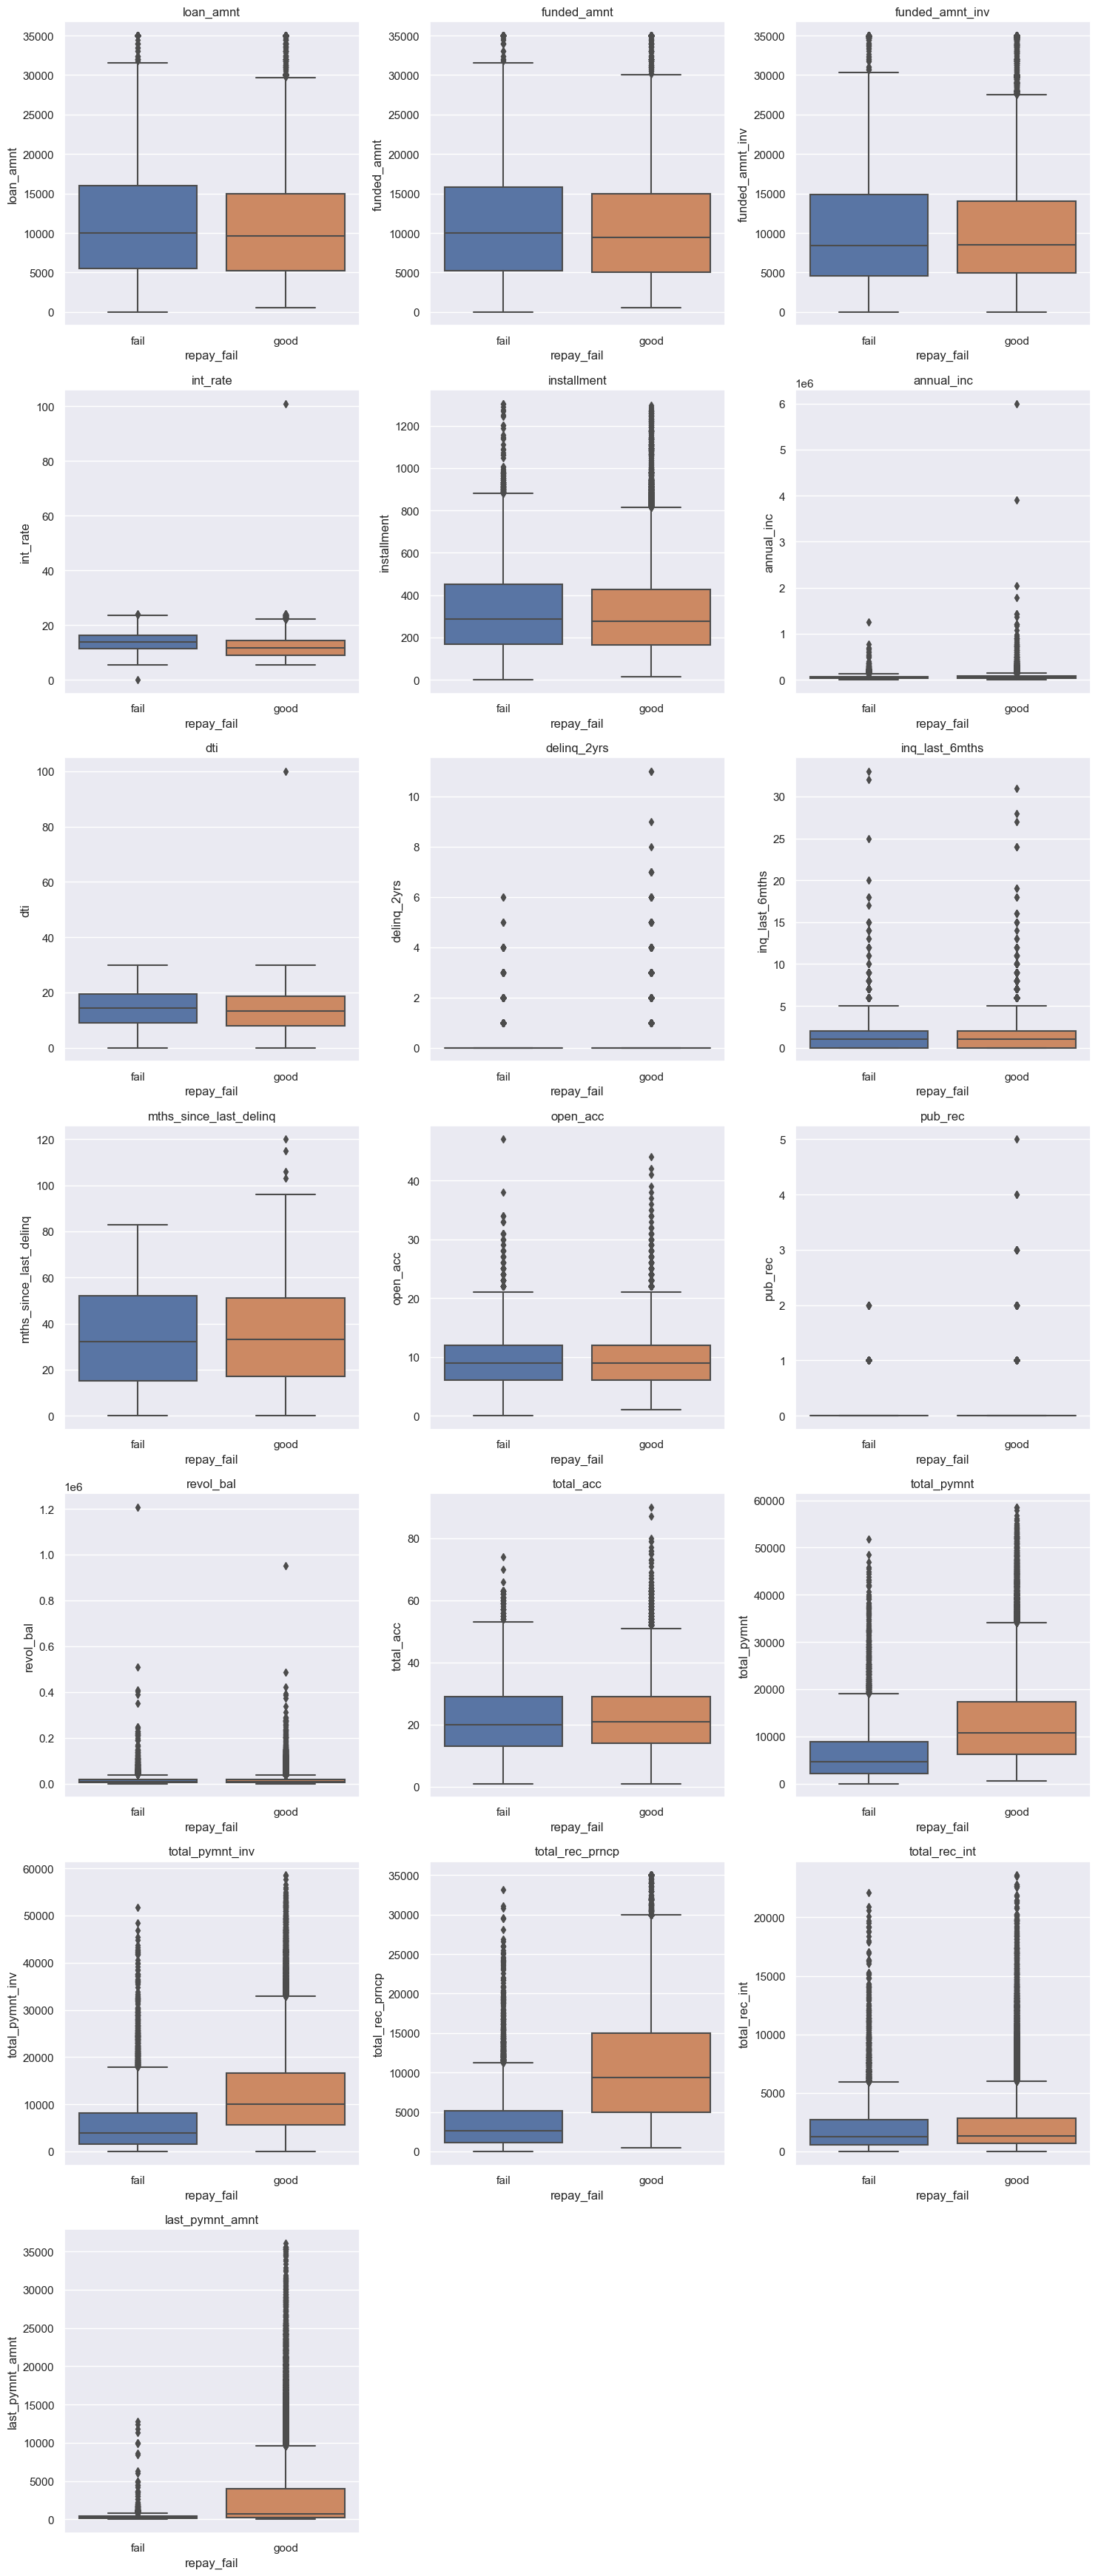

In [13]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='repay_fail', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

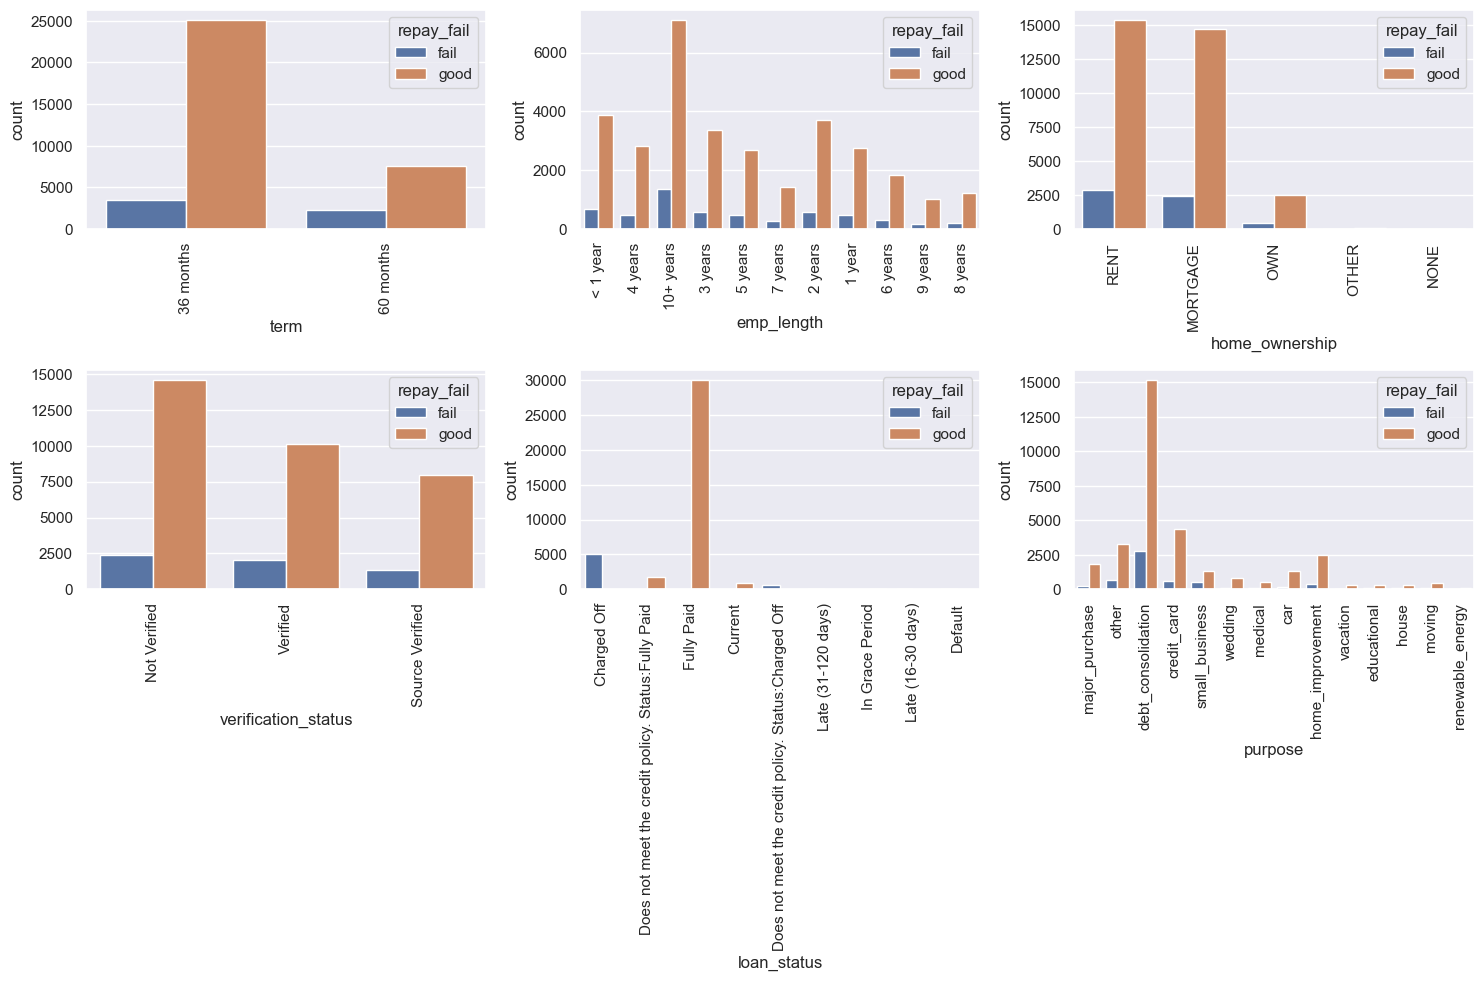

In [14]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Remove 'repay_fail' and 'addr_state' from the list of categorical variables
cat_vars = [var for var in cat_vars if var not in ['repay_fail', 'addr_state']]

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='repay_fail', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_22288\1947213718.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
C:\Users\Michael\AppData\Local\Temp\ipykernel_22288\1947213718.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
C:\Users\Michael\AppData\Local\Temp\ipykernel_22288\1947213718.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
C:\Users\Michael\AppData\Local\Temp\ipykernel_22288\1947213718.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
C:\Users\Michael\AppData\Local\Temp\ipykernel_22288\1947213718.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(df[var].unique(), rotation

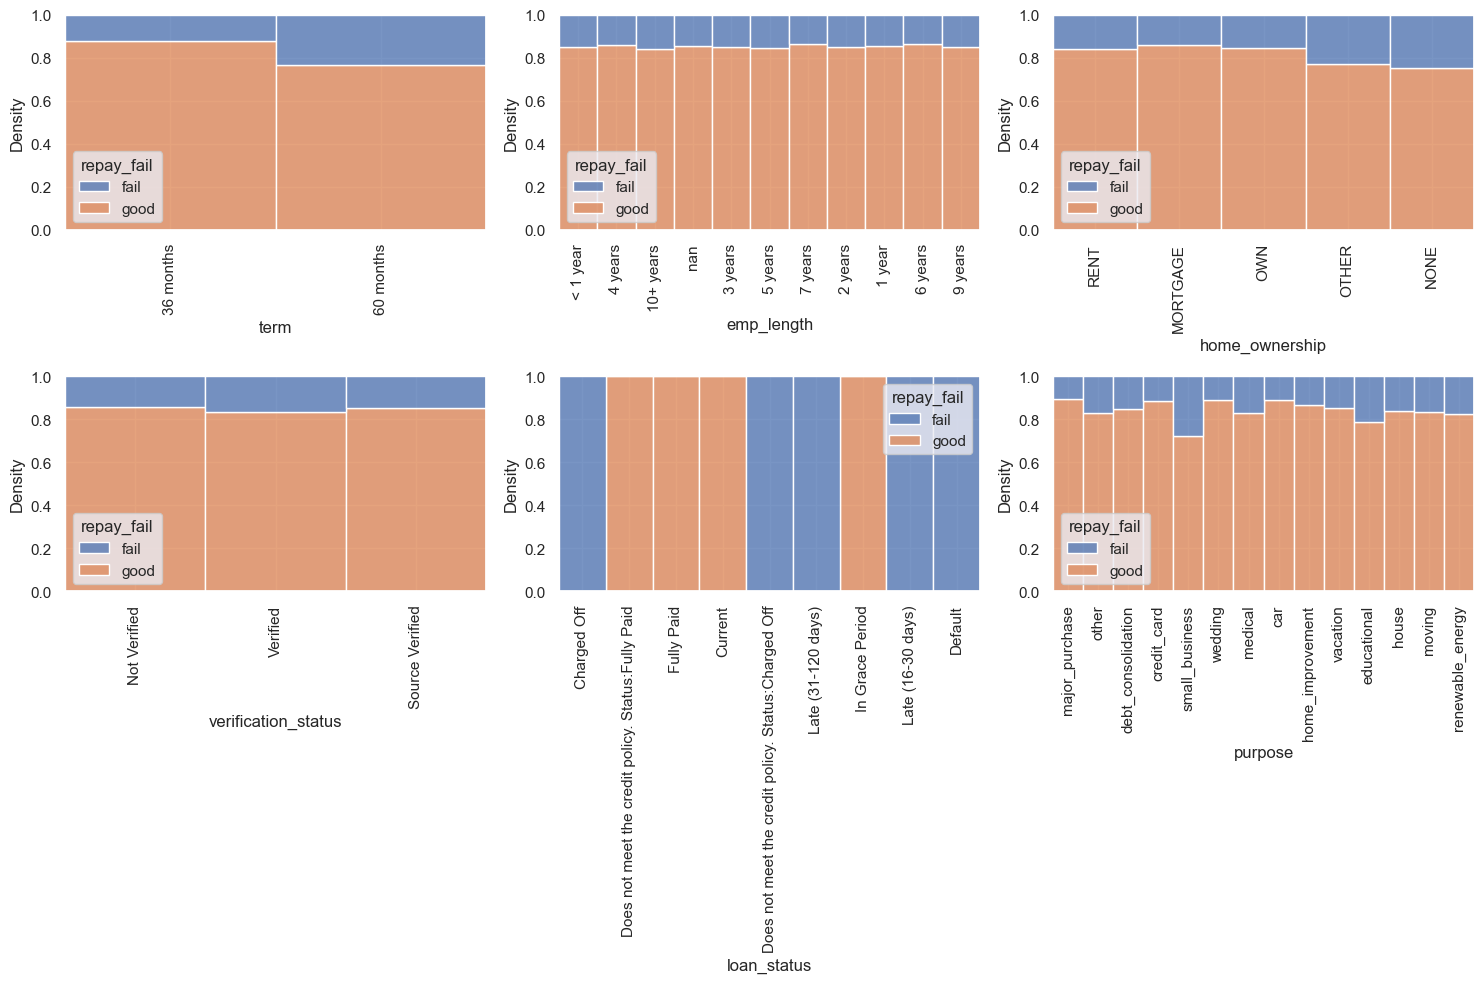

In [15]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Remove 'repay_fail' and 'addr_state' from the list of categorical variables
cat_vars = [var for var in cat_vars if var not in ['repay_fail', 'addr_state']]

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='repay_fail', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Data Preprocessing Part 2

In [16]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_delinq    63.313410
emp_length                 2.580561
revol_bal                  0.010395
annual_inc                 0.005198
loan_amnt                  0.002599
total_rec_int              0.002599
total_rec_prncp            0.002599
total_pymnt_inv            0.002599
total_pymnt                0.002599
total_acc                  0.002599
open_acc                   0.002599
pub_rec                    0.002599
funded_amnt                0.002599
inq_last_6mths             0.002599
delinq_2yrs                0.002599
installment                0.002599
funded_amnt_inv            0.002599
last_pymnt_amnt            0.002599
dtype: float64

In [17]:
# Drop 'mths_since_last_delinq' column because of 53% missing value
df.drop(columns = 'mths_since_last_delinq', inplace=True)

In [18]:
df.shape

(38480, 26)

In [19]:
# Other than that remove the remaining missing value because its very small
df.dropna(inplace=True)
df.shape

(37482, 26)

# Label Encoding for Object Datatypes

In [20]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

term: ['36 months' '60 months']
emp_length: ['< 1 year' '4 years' '10+ years' '3 years' '5 years' '7 years' '2 years'
 '1 year' '6 years' '9 years' '8 years']
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']
verification_status: ['Not Verified' 'Verified' 'Source Verified']
loan_status: ['Charged Off' 'Does not meet the credit policy. Status:Fully Paid'
 'Fully Paid' 'Does not meet the credit policy. Status:Charged Off'
 'Current' 'Late (31-120 days)' 'In Grace Period' 'Late (16-30 days)'
 'Default']
purpose: ['major_purchase' 'other' 'debt_consolidation' 'credit_card'
 'small_business' 'wedding' 'medical' 'car' 'home_improvement' 'vacation'
 'educational' 'house' 'moving' 'renewable_energy']
addr_state: ['Unknown' 'Michigan' 'New York' 'Texas' 'Alabama' 'Missouri' 'Ohio'
 'California' 'Arkansas' 'New Jersey' 'Arizona' 'Wisconsin' 'Virginia'
 'Georgia' 'Florida' 'Alaska' 'Minnesota' 'Maryland' 'Nevada' 'Kentucky'
 'Illinois' 'New Hampshire' 'Connecticut' 'Washington' 'North Car

In [21]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

term: [0 1]
emp_length: [10  4  1  3  5  7  2  0  6  9  8]
home_ownership: [4 0 3 2 1]
verification_status: [0 2 1]
loan_status: [0 4 5 3 1 8 6 7 2]
purpose: [ 6  9  2  1 11 13  7  0  4 12  3  5  8 10]
addr_state: [43 22 32 42  0 25 34  4  3 30  2 49 46 10  9  1 23 20 28 17 13 29  6 47
 33 40 44 36 21  8 50 16 37 39 38 18  5 11 35 45 26 31 48  7 41 24 27 14
 12 15 19]
repay_fail: [0 1]


<AxesSubplot:>

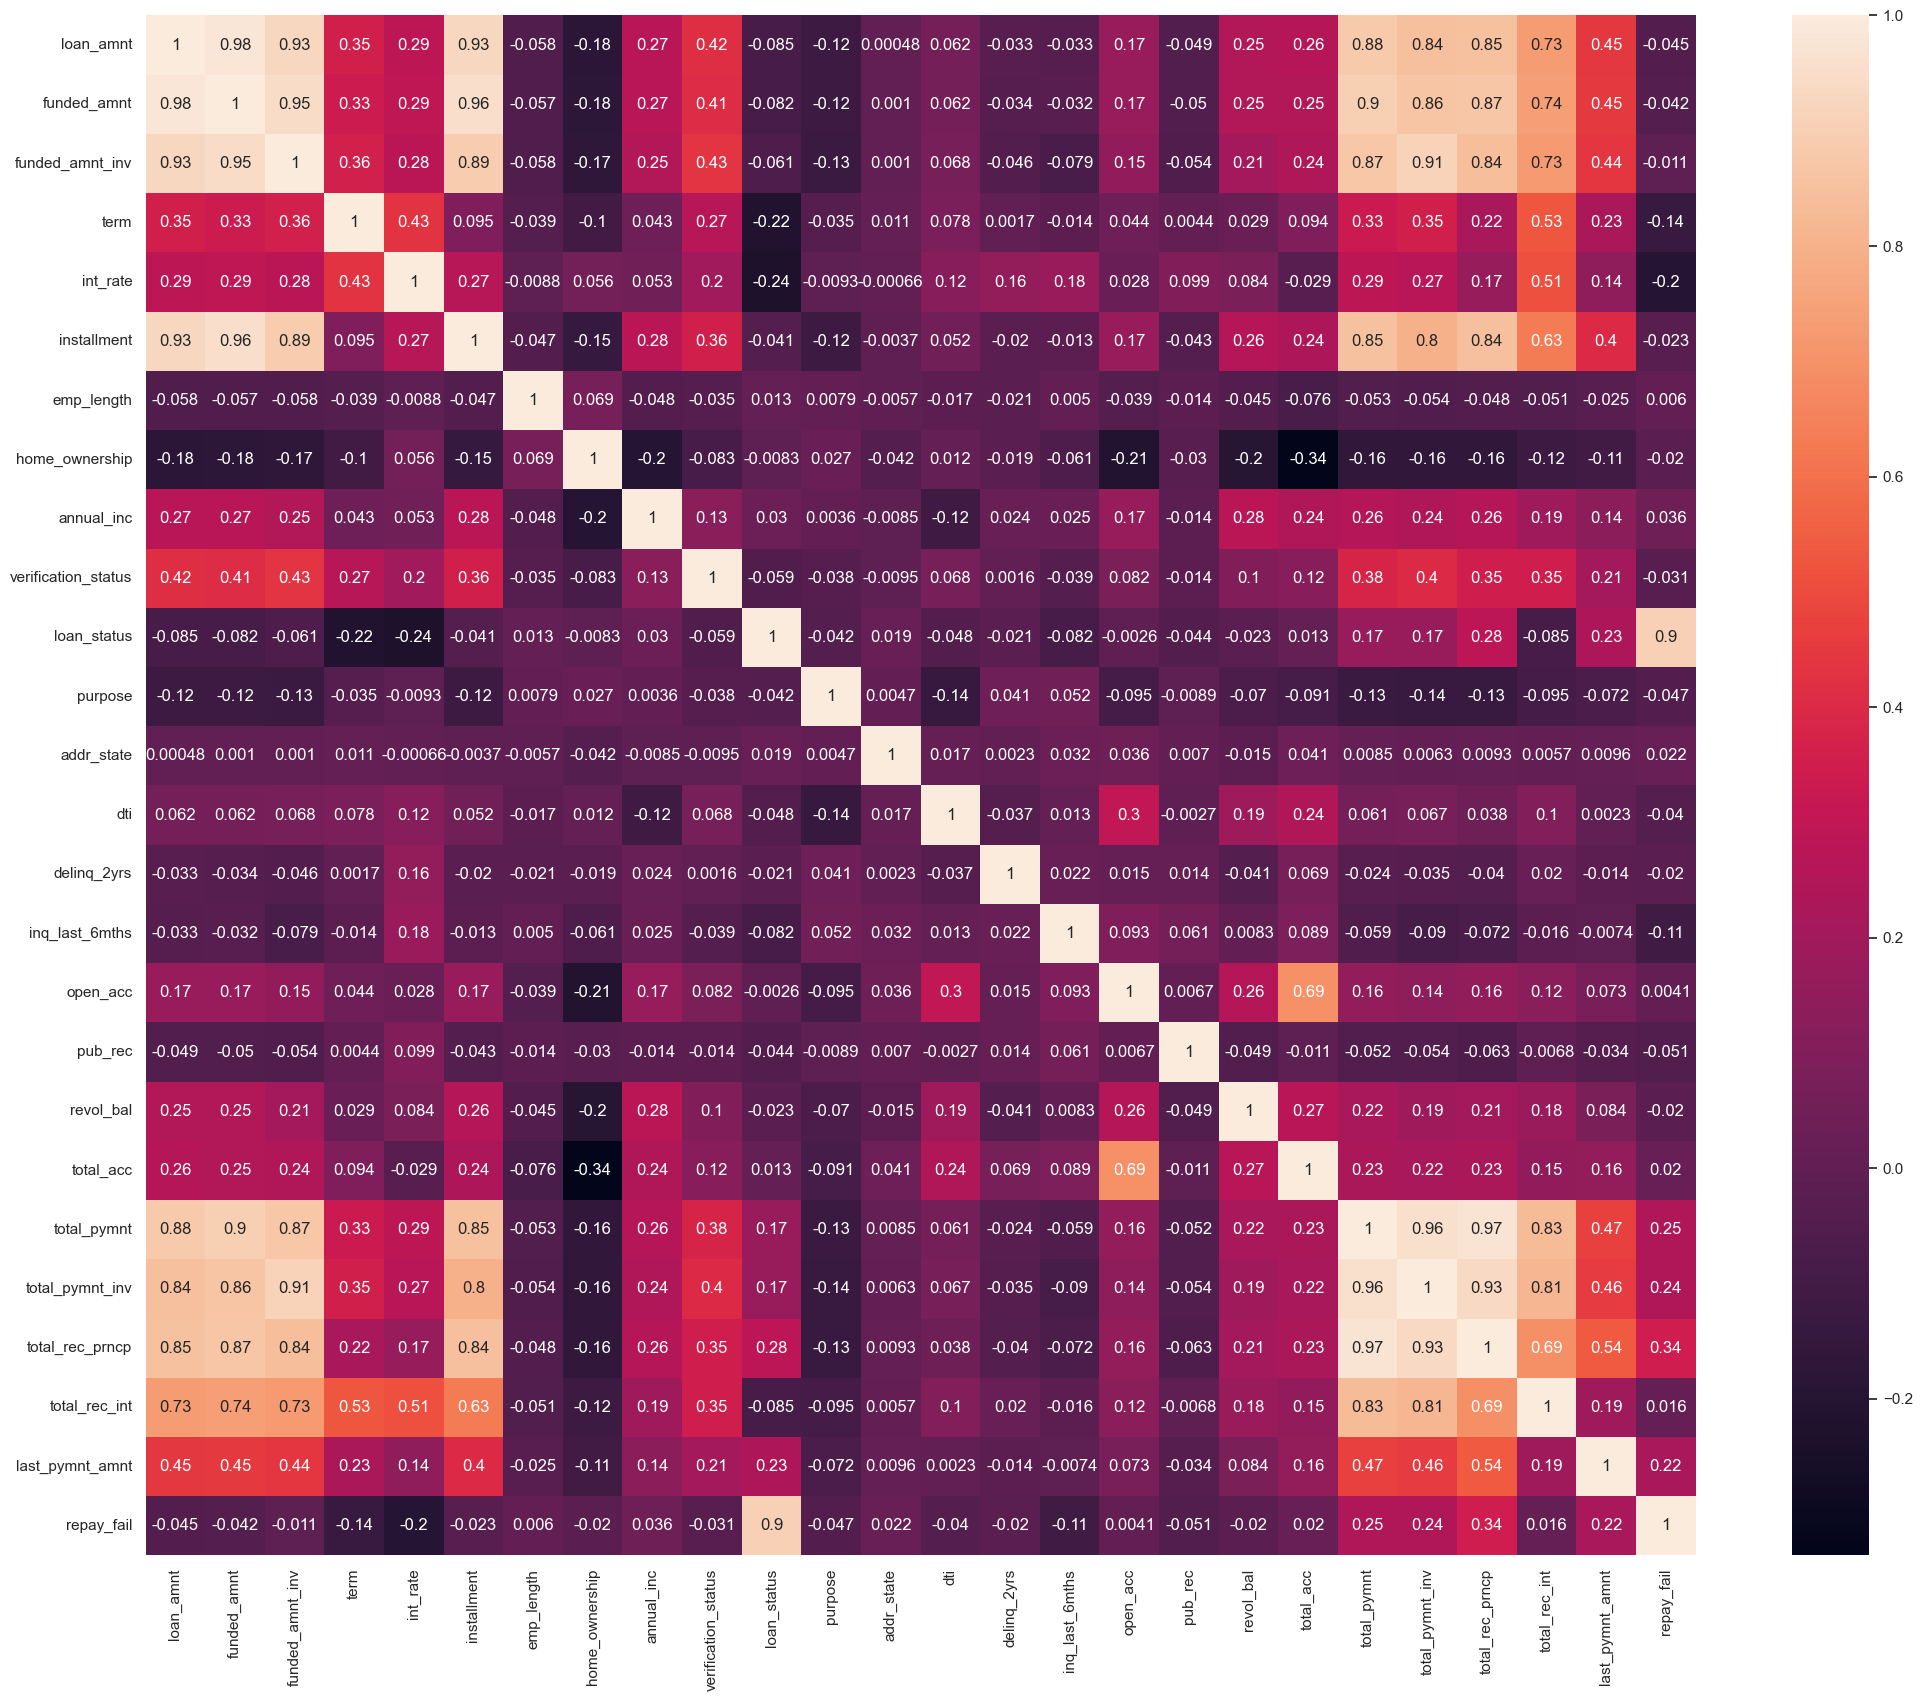

In [22]:
# Correlation Heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [23]:
# Drop column total_pymnt_inv, loan_status, total_rec_prncp, funded_amnt, funded_amnt_inv to reduce redudancy
df.drop(columns = ['total_pymnt_inv', 'loan_status', 'total_rec_prncp', 'funded_amnt', 'funded_amnt_inv'], inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0,0.00,0.00,10,4,0.0,0,6,43,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0
1,2500.0,0,13.98,85.42,4,4,20004.0,0,9,22,19.86,0.0,5.0,7.0,0.0,981.0,10.0,3075.291779,575.29,90.85,1
2,5000.0,0,15.95,175.67,4,4,59000.0,0,2,32,19.57,0.0,1.0,7.0,0.0,18773.0,15.0,2948.760000,873.81,175.67,0
3,7000.0,0,9.91,225.58,1,0,53796.0,0,9,42,10.80,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,1082.39,1550.27,1
4,2000.0,0,5.42,60.32,1,4,30000.0,0,2,32,3.60,0.0,0.0,7.0,0.0,0.0,15.0,2161.663244,161.66,53.12,1


# Train Test Split

In [24]:
X = df.drop('repay_fail', axis=1)
y = df['repay_fail']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Remove Outlier from Train Data using Z-Score

In [26]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['loan_amnt', 'int_rate', 'installment',
                    'annual_inc', 'dti', 'inq_last_6mths', 'total_acc',
                    'open_acc', 'revol_bal', 'total_pymnt', 'total_rec_int',
                    'last_pymnt_amnt']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.13 %


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='macro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='macro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='macro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='macro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8797094449188237
Precision Score :  0.8508975601761171
Recall Score :  0.9191632898501367
Jaccard Score :  0.7941235669734321
Log Loss :  2.4759879278905337


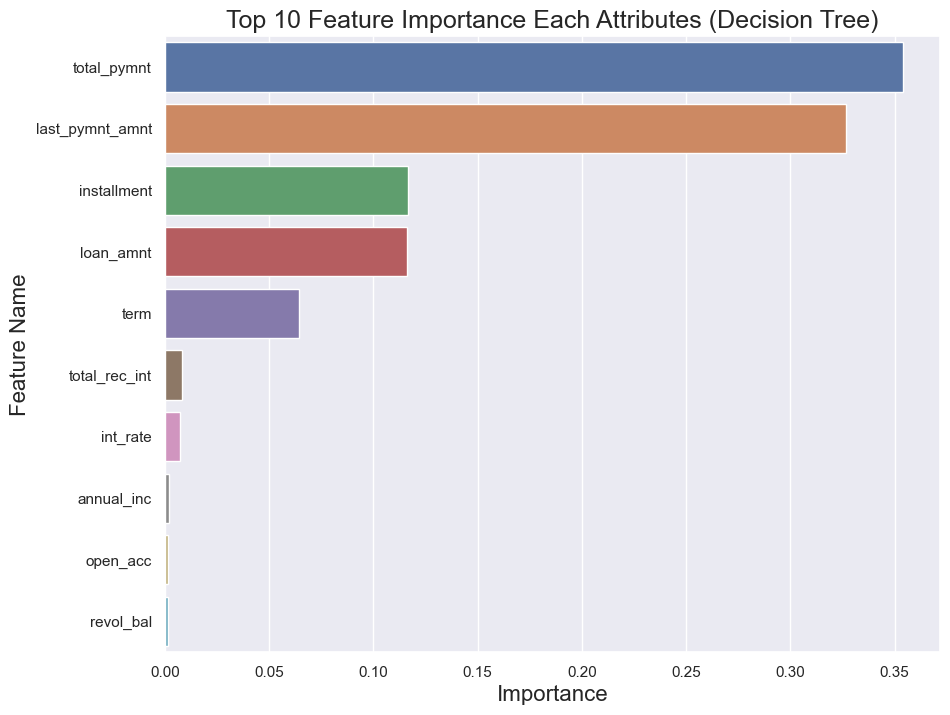

In [31]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


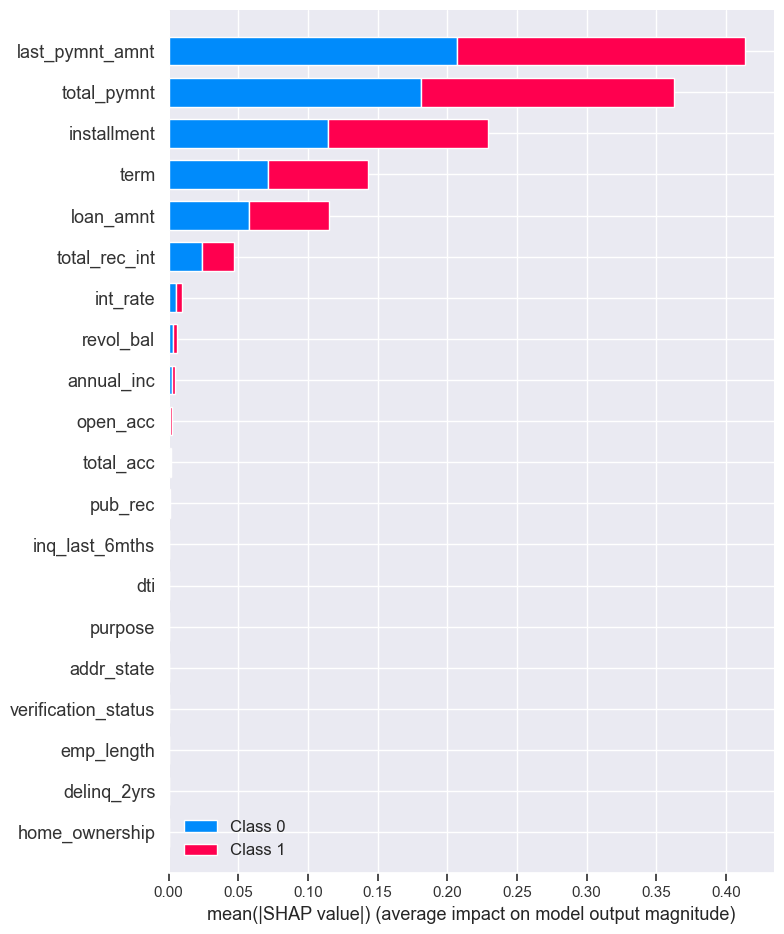

In [32]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

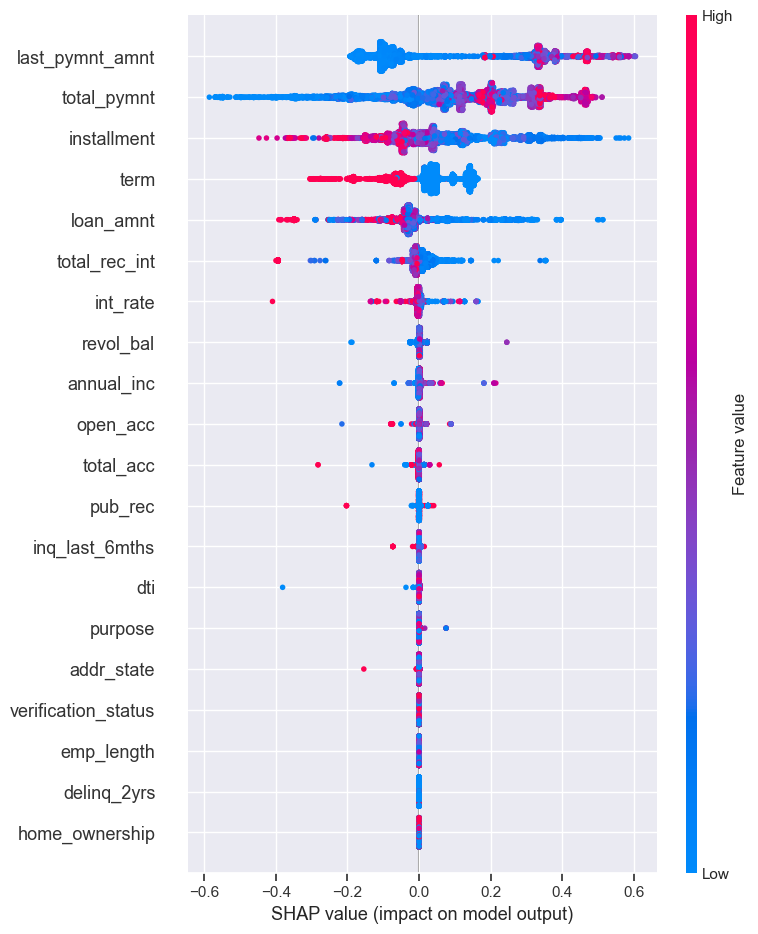

In [33]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9313058556756035')

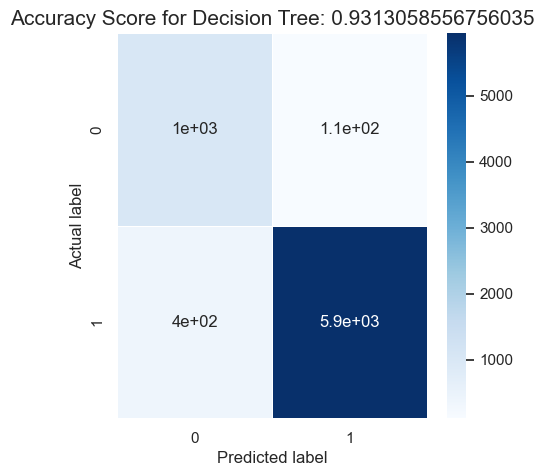

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

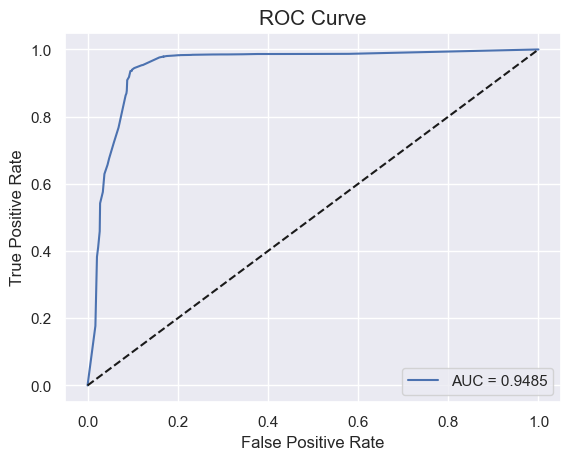

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# XGBoost Classifier

In [36]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.23 %


In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='macro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='macro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='macro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='macro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9642376752180895
Precision Score :  0.9876730731170377
Recall Score :  0.9439055659478695
Jaccard Score :  0.9321056657135853
Log Loss :  0.6394298920571672


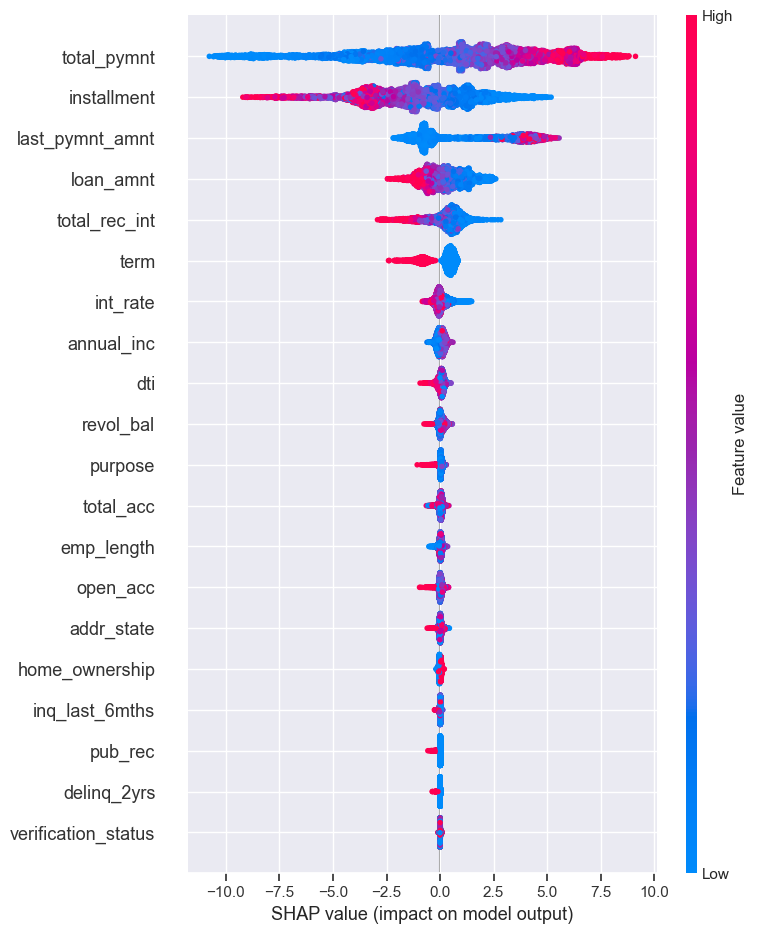

In [40]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.9822595704948646')

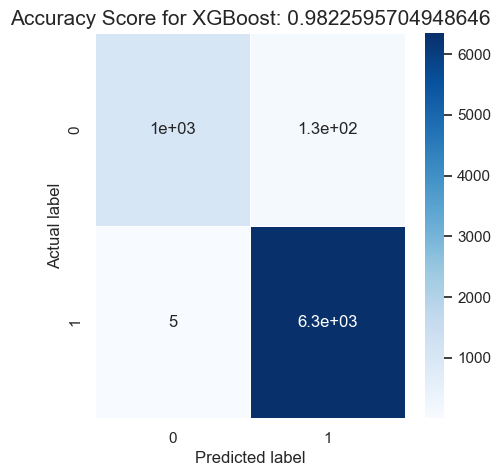

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

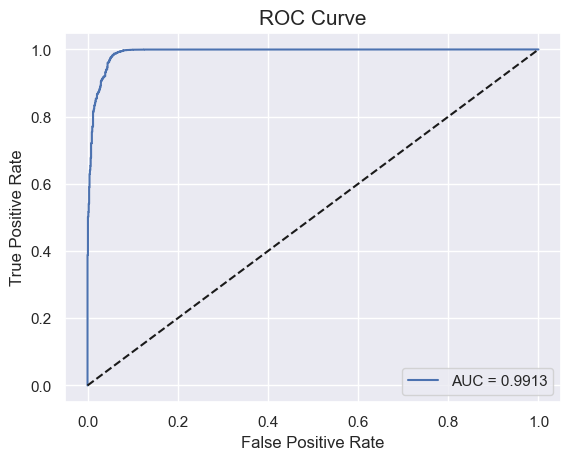

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()